In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import mpl_toolkits.mplot3d.art3d as art3d

import numpy as np
import h5py

import pickle

from glob import glob
import os
from decimal import Decimal

import matplotlib.colors as colors

plt.rcParams.update({'font.size': 15})

In [ ]:
# fname = f"fit_result/hess/history_batch9_hess_mu_6par_n_neigh4_mode_lut_diff_curr_no_noise_e_sampling_0.01cm_seed_strategy__grad_clip_bt100_tgtsd2_dtsd1_adam_mse_adc_f1b6f7c0-4826-48c9-9e5a-cf71cf7ce2ea.pkl"
fname = f"fit_result/hess/history_batch999_hess_mu_6par_n_neigh4_mode_lut_diff_curr_no_noise_e_sampling_0.01cm_seed_strategy__grad_clip_bt200_tgtsd2_dtsd1_adam_mse_adc_36c61815-7b5c-4c15-bedb-fc085ad81b86.pkl"
pkl_files = glob(fname)
history = pickle.load(open(pkl_files[0], "rb"))

/lscratch/cyifan/tmp/ipykernel_3191888/328469472.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+label)
/lscratch/cyifan/tmp/ipykernel_3191888/328469472.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+label)


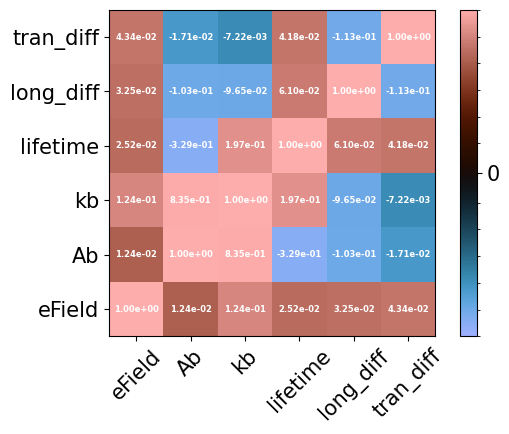

In [79]:
label = ['eField', 'Ab', 'kb', 'lifetime', 'long_diff', 'tran_diff']

par_norm = np.array([0.50, 0.8, 0.0486, 2200, 4.0e-6, 8.8e-6])
S= np.diag(par_norm)

lambda_scale = 1.0   # pseudo-posterior scale; tune if you want
damping = 1e-6

# Hessian H_theta
# matrix = np.mean(history['hessian'], axis=0).reshape(6,6)

# # Sigma_theta (Regularize and invert)
# H = np.mean(history['hessian'], axis=0).reshape(6,6)
# n = H.shape[0]
# matrix = np.linalg.inv(lambda_scale * H + damping * np.eye(n))

# # correlation theta (Regularize and invert)
# H = np.mean(history['hessian'], axis=0).reshape(6,6)
# n = H.shape[0]
# Sigma = np.linalg.inv(lambda_scale * H + damping * np.eye(n))
# std = np.sqrt(np.diag(Sigma))
# matrix = Sigma / np.outer(std, std)

# # Hessian normalised H_phi
# matrix = S @ np.mean(history['hessian'], axis=0).reshape(6,6) @ S

# # # Sigma_phi normalised (Regularize and invert)
# H = S @ np.mean(history['hessian'], axis=0).reshape(6,6) @ S
# n = H.shape[0]
# matrix = np.linalg.inv(lambda_scale * H + damping * np.eye(n))

# correlation phi (Regularize and invert)
H = S @ np.mean(history['hessian'], axis=0).reshape(6,6) @ S
n = H.shape[0]
Sigma = np.linalg.inv(lambda_scale * H + damping * np.eye(n))
std = np.sqrt(np.diag(Sigma))
matrix = Sigma / np.outer(std, std)

# matrix = np.linalg.inv(np.mean(history['hessian'], axis=0).reshape(6,6))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix,
                 origin="lower", cmap="berlin", #"vanimo", #"managua", #cmap="berlin",
                 # norm=colors.SymLogNorm(linthresh=1E-6, linscale=1,
                 #                      vmin=-1E1, vmax=1E4, base=10))
                 # norm=colors.SymLogNorm(linthresh=1E-10, linscale=1,
                 #                      vmin=-1E6, vmax=1E6, base=10))
                 # norm=colors.SymLogNorm(linthresh=1E-4, linscale=1,
                 #                      vmin=-1E3, vmax=1E3, base=10))
                 norm=colors.SymLogNorm(linthresh=1E-5, linscale=1,
                                      vmin=-1E0, vmax=1E0, base=10))

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(j, i, f"{matrix[i, j]:.2e}", va='center', ha='center', fontweight='bold',color='white', fontsize=6)

plt.subplots_adjust(bottom=0.2)
ax.set_xticklabels(['']+label)
ax.tick_params(axis='x', labelrotation=45)
ax.xaxis.set_ticks_position('bottom')
ax.set_yticklabels(['']+label)
cbar= fig.colorbar(cax)

# tick_values = [-1E5, 0, 1E5]
# tick_labels = [f"{-1E5:.1e}", 0, f"{1E5:.1e}"]
tick_values = [0]
tick_labels = [0]

cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_labels)
# plt.title("Hessian")
plt.savefig("plots/pseudo_correlation_normalised.pdf")
plt.show()